Test using numbalsoda

In [1]:
from numbalsoda import lsoda_sig, lsoda, dop853
from numba import njit, cfunc
import numpy as np
import matplotlib.pyplot as plt

@cfunc(lsoda_sig)
def rhs(t, u, du, p):
    du[0] = u[0]-u[0]*u[1]
    du[1] = u[0]*u[1]-u[1]*p[0]

funcptr = rhs.address # address to ODE function
u0 = np.array([5.,0.8]) # Initial conditions
data = np.array([1.0]) # data you want to pass to rhs (data == p in the rhs).
t_eval = np.linspace(0.0,50.0,1000) # times to evaluate solution

# integrate with lsoda method
usol, success = lsoda(funcptr, u0, t_eval, data = data)

# integrate with dop853 method
#usol1, success1 = dop853(funcptr, u0, t_eval, data = data)

@njit
def test():
    usol, success = dop853(funcptr, u0, t_eval, data = data)
    return usol

usol = test() # this works!

Test adding two waves.

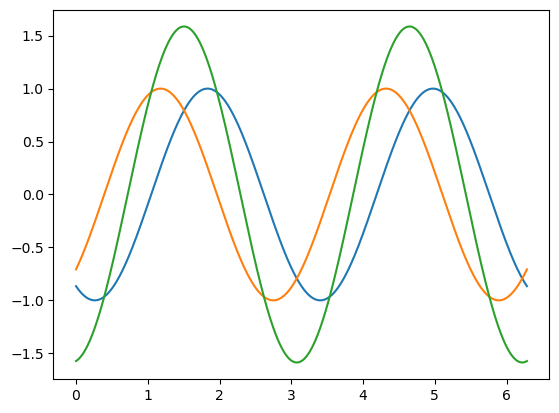

In [6]:
x = np.linspace(0, 2*np.pi, 1000)
wavelength = np.pi
y1 = 1*np.sin(2*np.pi/np.pi * x - np.pi/1.5)
y2 = 1*np.sin(2*np.pi/np.pi * x - np.pi/4)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y1+y2)

new_wave = 1j*np.exp(np.pi/1.5)+1j*np.exp(np.pi/4)
A = abs(new_wave)**2
phase = np.angle(new_wave)

plt.plot(x, A*np.sin(2*np.pi/np.pi * x - phase), '--', color = 'g')
